In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import glob

# Loading up Data

In [2]:
df = pd.read_csv('bank-additional-full.csv')
df.head(5)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


As seen above, the csv will required some data clean up in order to have the data in a standard tabular formatWe will do this in the following line.

In [3]:
#Parser
df = pd.read_csv('bank-additional-full.csv')
columns = df.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
df = df.values
df = [items[0].split(';') for items in df]
df = pd.DataFrame(df,columns = columns)
df['job'] = df['job'].str.replace('"', '')
df['marital'] = df['marital'].str.replace('"', '')
df['education'] = df['education'].str.replace('"', '')
df['default'] = df['default'].str.replace('"', '')
df['housing'] = df['housing'].str.replace('"', '')
df['loan'] = df['loan'].str.replace('"', '')
df['contact'] = df['contact'].str.replace('"', '')
df['month'] = df['month'].str.replace('"', '')
df['poutcome'] = df['poutcome'].str.replace('"', '')
df['y'] = df['y'].str.replace('"', '')
bankdata = df
pd.options.display.max_columns = None
bankdata.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,"""mon""",261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,"""mon""",149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,"""mon""",226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,"""mon""",151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,"""mon""",307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


The parser was able to put the data into the respective columns. We can now do some EDA

# Elementary Data Analysis

### Attribute Information(Taken from UCI Machine Learning Repository):

Input variables:
#### bank client data:
1 - age (numeric)\
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-\
employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\
5 - default: has credit in default? (categorical: 'no','yes','unknown')\
6 - housing: has housing loan? (categorical: 'no','yes','unknown')\
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')\
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)\
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)\
14 - previous: number of contacts performed before this campaign and for this client (numeric)\
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)\
17 - cons.price.idx: consumer price index - monthly indicator (numeric)\
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)\
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)\
20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  object
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  object
 11  campaign        41188 non-null  object
 12  pdays           41188 non-null  object
 13  previous        41188 non-null  object
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

We have 41188 data entries with 20 different features. None of the columns contained any NAs, reducing our data clean up process. Column y is the target response. We can also see that all the columns are objects. This is incorrect since we have numerical values like pdays, emp.var.rate, etc. We will need to convert the columns into the appropriate data type.

In [108]:
## Ensuring duplicates are actually duplicates. 
data_dup_first=bankdata[bankdata.duplicated(keep="first")]
data_dup_last=bankdata[bankdata.duplicated(keep="last")]
data_dup_last
data_dup_first

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [8]:
#Dropping duplicates 
bankdata=bankdata.drop(index = data_dup_last.index)

In [ ]:
#Replacing column y from 'Yes/No' to 1/0
bankdata.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [103]:
#Converting object datatype to float.
convert_list = ['age','duration','pdays','previous','emp.var.rate','cons.price.idx','campaign','cons.conf.idx','euribor3m','nr.employed']
for i in convert_list:
    bankdata[i]= bankdata[i].astpe('float')
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  float64
 12  pdays           41176 non-null  float64
 13  previous        41176 non-null  float64
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [10]:
#Summary statistics for each column 
bankdata.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,"""thu""",NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10419,24921,12164,32577,21571,33938,26135,13767,8618,NaN,NaN,NaN,NaN,35551,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.315815,2.567879,962.464810,0.173013,NaN,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.305321,2.770318,186.937102,0.494964,NaN,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


From the summary statistics above, we can tell that the average age of our population is 40 years old. Majority of the population has a universtity education and are married with no personal loans and no history of defaulting

In [110]:
# Printing out categorical values with a high degree of cardinality
print('********Jobs with respective number*********')
print(bankdata.job.value_counts())
print('********education with respective number*********')
print(bankdata.education.value_counts())
print('********martial with respective number*********')
print(bankdata.marital.value_counts())

********Jobs with respective number*********
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
********education with respective number*********
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
********martial with respective number*********
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64


We can see that there are insignificant amount of unknowns in each of the respective categories. This means the data is quite thorough.

### Analyzing Response Variables (y-value)

<AxesSubplot:xlabel='y', ylabel='count'>

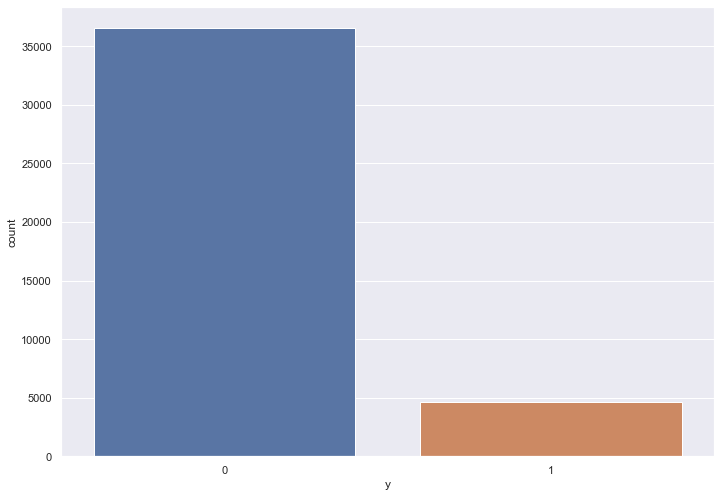

In [113]:
sns.countplot(x='y',data=bankdata)

In [117]:
print('Percent of unsuccesful calls: ',len(bankdata[bankdata['y']==0])/len(bankdata[['y']]))
print('Percent of successful calls: ', 1 - len(bankdata[bankdata['y']==0])/len(bankdata[['y']]) )

Percent of unsuccesful calls:  0.8873372838546726
Percent of successful calls:  0.11266271614532741


The amount of unsuccessful call is 89%. This means the response variable is inbalanced. Inbalanced response.Because of this, metrics such as accuracy is misleading and inapporiate for our problem(ie: if we use model that always predict failure, model will have an accuracy of 89%). There were two metrics that we considered: F1 score & Receiver Operating Characteristic Area Under Curve Score (AUC-ROC). To be aligned with the given research paper, ROC AUC was selected. This will also have a impact on our train/test split cross validation, as we will need to stratify the training and testing subdataset.

### Univariate Analysis

#### Analyzing Categorical Variables

In [118]:
#Getting the list of categorical variables
cat_list = bankdata.select_dtypes(exclude=["number"]).columns
cat_list

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

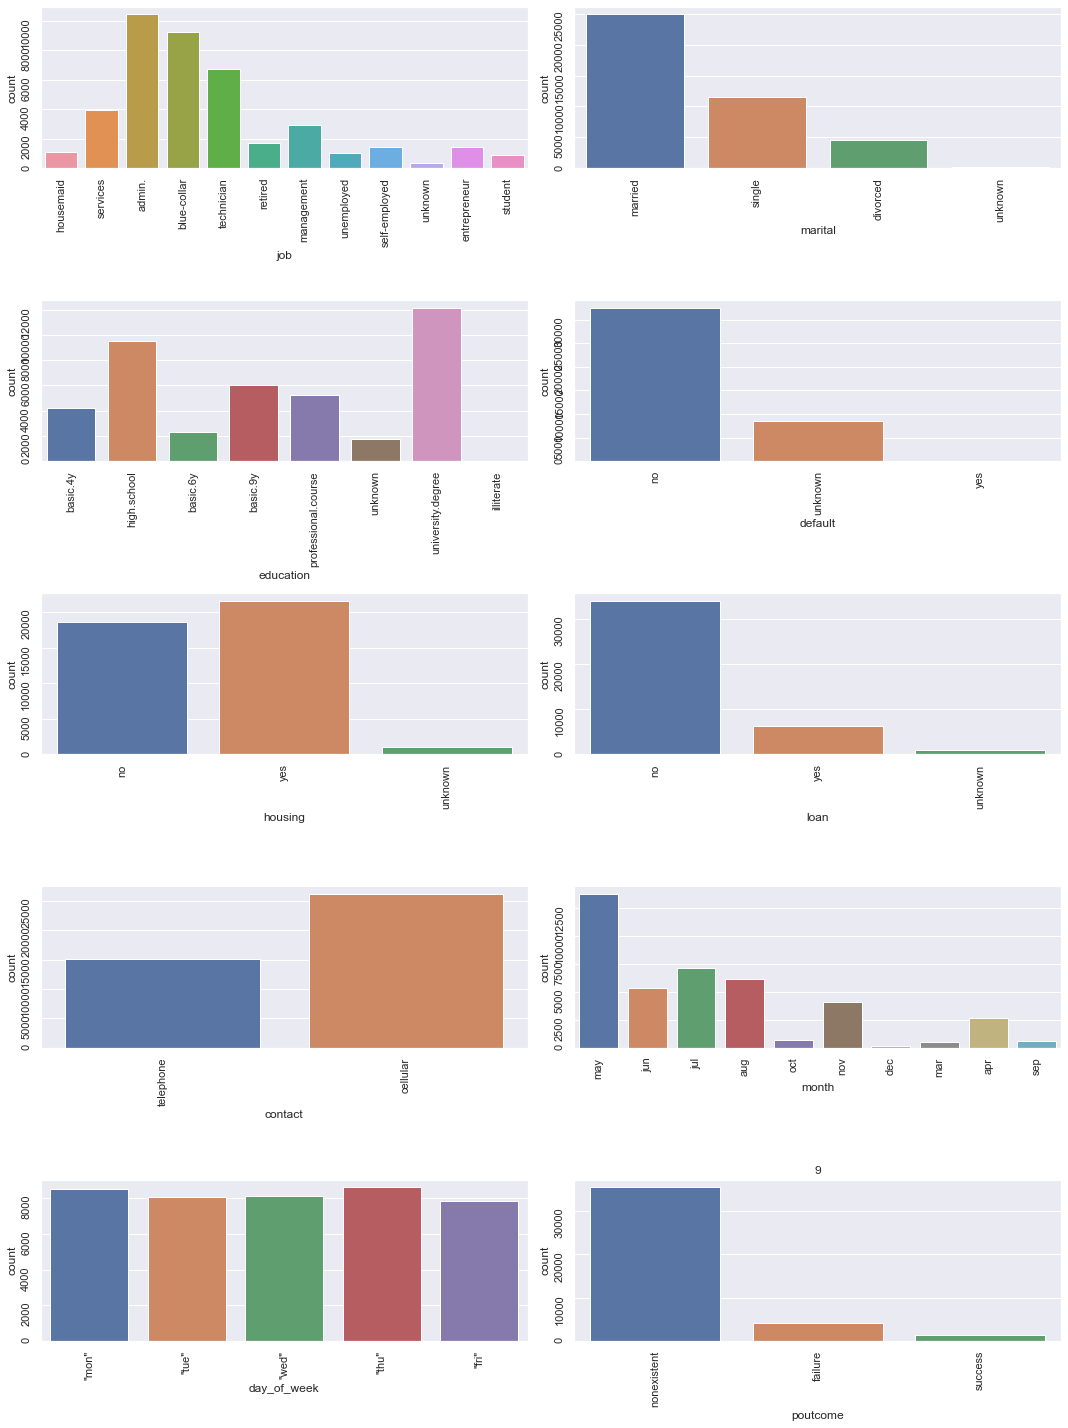

In [120]:
#Creating plots for each category
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15,20))
i = 0 
for ax in axes.flat:
    sns.countplot(x=cat_list[i],data=bankdata,ax=ax)
    plt.title(i)
    for ax in fig.axes:
        ax.tick_params(labelrotation=90)
    i +=1
fig.tight_layout()

key findings:
* Most common job is admin and followed by blue-collar. 
* Marriage status is mostly marry.
* Education level is university.
* The call agent contacted clients the most in the month of May, but day of the week is evenly distributed .
* Housing is to be slight skewed toward to "yes".
* Majority of the clients was never called before regarding term deposits.

### Numerical Variables

In [16]:
#Getting the list of numerical variables
num_list = bankdata.select_dtypes(exclude=["object"]).columns

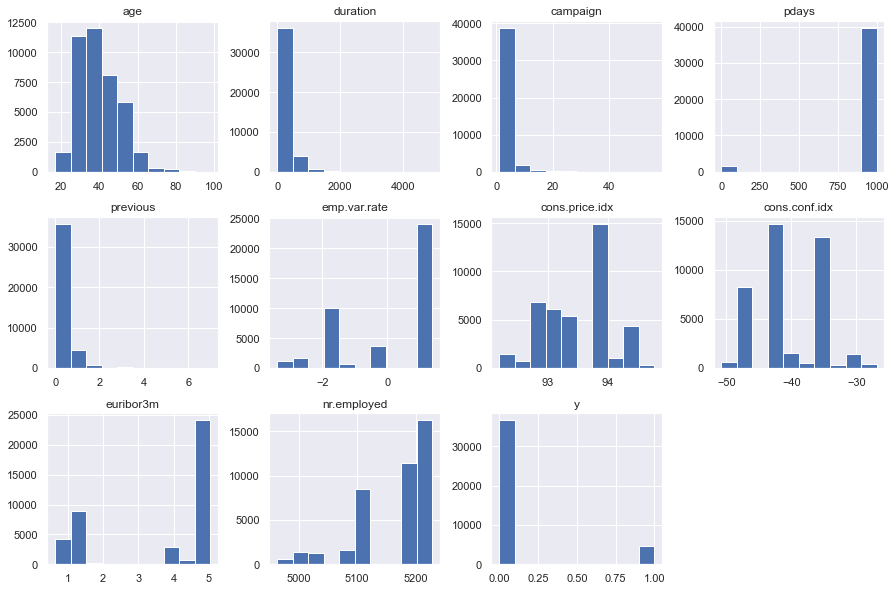

In [121]:
#Creating plots for each numerical variable
bankdata[num_list].hist(bins=10, figsize=(15, 10), layout=(3,4));

key findings:
* Seems the majority of the age is between 25-50 
* Pdays is skewed to the right. This is because for clients that never got contacted before, the default value is 999. This means majority of the population was never contacted
* We will be dropping duration from our dataset, as it is not a reliable feature for predictive model(see: Attribute Information)
* For the variable campaign, we will need to investigate a little futher. It seems there are some outliers in the upper regions. 
* The other variables were included by the research to enchanced the dataset from central bank of Portuguese Republic statistical website.

In [18]:
bankdata[bankdata.campaign>20].campaign.value_counts().sort_index()

21.0    24
22.0    17
23.0    16
24.0    15
25.0     8
26.0     8
27.0    11
28.0     8
29.0    10
30.0     7
31.0     7
32.0     4
33.0     4
34.0     3
35.0     5
37.0     1
39.0     1
40.0     2
41.0     1
42.0     2
43.0     2
56.0     1
Name: campaign, dtype: int64

<AxesSubplot:ylabel='campaign'>

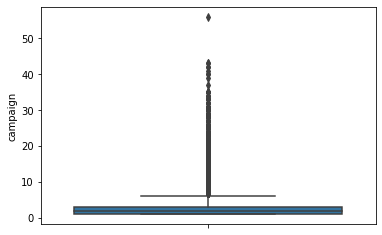

In [19]:
%matplotlib inline
sns.boxplot(data=bankdata, y = 'campaign')

In [20]:
bankdata[bankdata.campaign>40]
# No issues with bankdata.campaign

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32.0,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,"""mon""",261.0,56.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
4168,29.0,technician,married,professional.course,no,yes,no,telephone,may,"""mon""",124.0,42.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
5304,44.0,retired,married,basic.9y,no,yes,no,telephone,may,"""fri""",147.0,42.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
11033,38.0,blue-collar,married,basic.4y,no,yes,no,telephone,jun,"""wed""",25.0,41.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
13447,32.0,technician,single,university.degree,no,yes,yes,telephone,jul,"""wed""",16.0,43.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18728,54.0,admin.,married,university.degree,unknown,yes,no,cellular,jul,"""thu""",65.0,43.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0


### Correlation Analysis

<AxesSubplot:>

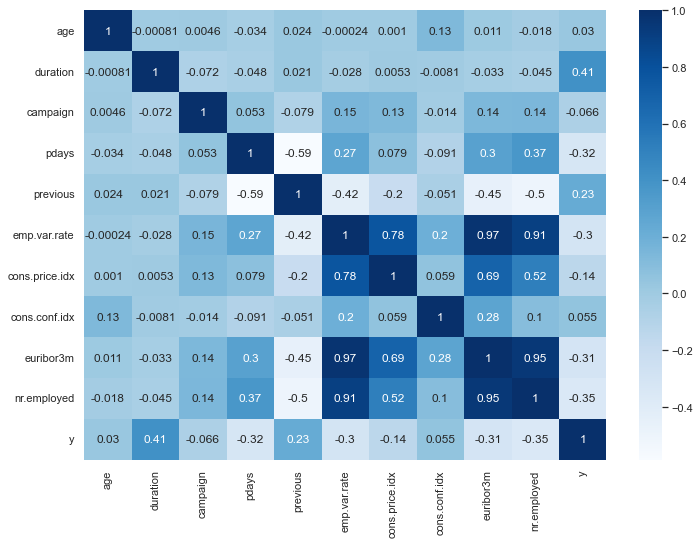

In [122]:
#Heatmap for each correlation
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(bankdata[num_list].corr(),annot=True,cmap="Blues")


There seems to be a lot of correlations for the economical indexes(bottom right graph). This make sense since each economical variable is used to describe the overall health of the economy when the data was collected

In [24]:
#Correlation > 0.3 is considered moderated or highly correlated.
a = bankdata[num_list].corr().abs().unstack().sort_values(kind='quicksort',ascending=False)
b = a.drop_duplicates()
b[b>0.3]

age             age               1.000000
emp.var.rate    euribor3m         0.972244
nr.employed     euribor3m         0.945146
                emp.var.rate      0.906949
emp.var.rate    cons.price.idx    0.775293
cons.price.idx  euribor3m         0.688180
pdays           previous          0.587508
nr.employed     cons.price.idx    0.521945
                previous          0.501411
euribor3m       previous          0.454571
previous        emp.var.rate      0.420587
duration        y                 0.405297
nr.employed     pdays             0.372659
                y                 0.354669
y               pdays             0.324948
                euribor3m         0.307740
dtype: float64

In our model building process, we will have to keep in mind these highly correlated variables when selecting it for our Logistic regression models. Since Logistic regression is a generalized linear model, reducing some highly correlated features may improve the overall performance of the model (reducing overfitting)

# Preprocecssing

### Train/Test split

We are doing train/test split so we can do cross-validation later

In [492]:
### Data is inbalance. When splitting the dataset, we need to stratify.
from sklearn.model_selection import train_test_split
bankdata_x = bankdata.iloc[:,:-1]
bankdata_y = bankdata['y']
X_train,X_test,Y_train,Y_test = train_test_split(bankdata_x,bankdata_y,test_size=.1,stratify=bankdata_y,random_state=15)

### OneHot Encoding

In [493]:
#OneHotEncoding Training data
from sklearn.feature_extraction import DictVectorizer
DictV = DictVectorizer()
DictV.fit(X_train[cat_list].to_dict(orient='records'))
feature_names=DictV.get_feature_names_out()
Dict_data = DictV.transform(X_train[cat_list].to_dict(orient='records')).toarray()
Dict_dataFrame = pd.DataFrame(data=Dict_data,columns = feature_names,index=X_train.index)
X_train_encoded = pd.concat([X_train,Dict_dataFrame],axis=1)
X_train_encoded = X_train_encoded.drop(columns=cat_list)
##### Documation states that we should drop duration as column when using predictive modeling
X_train_encoded = X_train_encoded.drop(columns=['duration'])

In [494]:
#OnehotEncoding Testing data
from sklearn.feature_extraction import DictVectorizer
DictV = DictVectorizer()
DictV.fit(X_test[cat_list].to_dict(orient='records'))
feature_names=DictV.get_feature_names()
Dict_data = DictV.transform(X_test[cat_list].to_dict(orient='records')).toarray()
Dict_dataFrame = pd.DataFrame(data=Dict_data,columns = feature_names,index=X_test.index)
X_test_enc = pd.concat([X_test,Dict_dataFrame],axis=1)
X_test_enc= X_test_enc.drop(columns=cat_list)
##### Documation states that we should drop duration as column when using predictive modeling
X_test= X_test.drop(columns=['duration'])
X_test_enc= X_test_enc.drop(columns=['duration'])
##### The test dataset does not contained default='yes'. We will need to add the column back in, so our predictive model will fit
#X_test_enc['default=yes'] = [0]*len(X_test_enc)
X_test_enc

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact=cellular,contact=telephone,"day_of_week=""fri""","day_of_week=""mon""","day_of_week=""thu""","day_of_week=""tue""","day_of_week=""wed""",default=no,default=unknown,default=yes,education=basic.4y,education=basic.6y,education=basic.9y,education=high.school,education=illiterate,education=professional.course,education=university.degree,education=unknown,housing=no,housing=unknown,housing=yes,job=admin.,job=blue-collar,job=entrepreneur,job=housemaid,job=management,job=retired,job=self-employed,job=services,job=student,job=technician,job=unemployed,job=unknown,loan=no,loan=unknown,loan=yes,marital=divorced,marital=married,marital=single,marital=unknown,month=apr,month=aug,month=dec,month=jul,month=jun,month=mar,month=may,month=nov,month=oct,month=sep,poutcome=failure,poutcome=nonexistent,poutcome=success
3158,52.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.860,5191.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12914,24.0,2.0,999.0,0.0,1.4,93.918,-42.7,4.962,5228.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38039,56.0,1.0,999.0,0.0,-3.4,92.379,-29.8,0.778,5017.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
37710,35.0,1.0,3.0,1.0,-2.9,92.201,-31.4,0.851,5076.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26731,35.0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.076,5195.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,33.0,3.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9452,43.0,2.0,999.0,0.0,1.4,94.465,-41.8,4.967,5228.1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29788,32.0,1.0,999.0,1.0,-1.8,93.075,-47.1,1.405,5099.1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16345,29.0,1.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [495]:
#Ensure both X_test & X_train_encoded has the same number of columns
display(len(X_test_enc.columns))
display(len(X_train_encoded.columns))

62

62

# Predictive Modeling

### Baseline model

In [134]:
#Creating a model that just predicts 0 and see the accuracy.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
#Baseline
modelV0 = [0]*len(Y_train)
print(confusion_matrix(Y_train,modelV0))
print('Accuracy Score: ', accuracy_score(Y_train,modelV0))
print('Precision_score: ',precision_score(Y_train,modelV0))
print('Recall_score: ', recall_score(Y_train,modelV0))

[[32883     0]
 [ 4175     0]]
Accuracy Score:  0.8873387662582978
Precision_score:  0.0
Recall_score:  0.0


C:\Users\leung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The following function will be used repeated for all models. It prints out the accuracy score, precision score, recall score, and AUC score. It also plots the confusion matrix and ROC AUC curve.

### Logistic Regression

In [273]:
from sklearn.linear_model import LogisticRegression
LogModelV1= LogisticRegression(max_iter=10000,C=1,class_weight='balance')
LogModelV1.fit(X_train_encoded,Y_train)
ypredmv1=LogModelV1.predict(X_train_encoded)

In [514]:
def Logmetrics(model,X_value,Y_pred):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    proba = model.predict_proba(X_value)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_train,model.predict_proba(X_value)[:,1])
    confmat = confusion_matrix(Y_train,Y_pred)
    print('Accuracy Score: ', accuracy_score(Y_train,Y_pred))
    print('Precision_score: ',precision_score(Y_train,Y_pred))
    print('Recall_score: ', recall_score(Y_train,Y_pred))
    print('AUC Score ', roc_auc_score(Y_train,proba))
    proba = model.predict_proba(X_value)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_train,model.predict_proba(X_value)[:,1])
    ax[0].plot(fpr,tpr)
    ax[0].set_title('ROC Curve AUC')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    sns.heatmap(confmat,annot=True,ax=ax[1],fmt='g',cmap='Reds')
    ax[1].set_title('Confusion Matrix')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')


Accuracy Score:  0.9002374655944735
Precision_score:  0.6714490674318508
Recall_score:  0.22419161676646707
AUC Score  0.7895197143346734


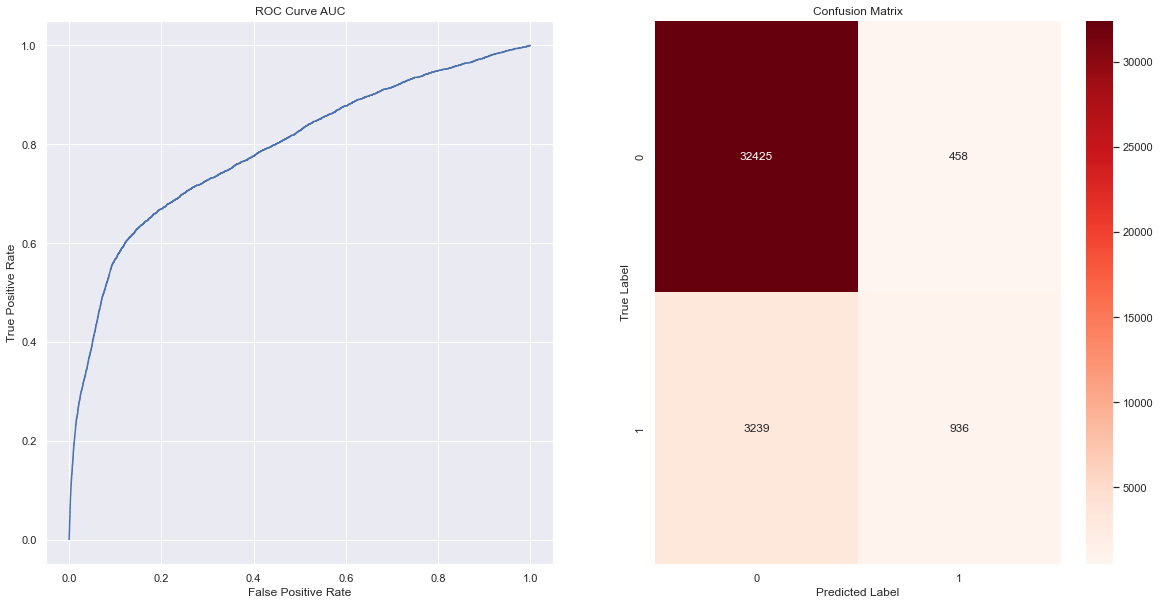

In [275]:
Logmetrics(LogModelV1,X_train_encoded,ypredmv1)

In [276]:
from sklearn.model_selection import cross_val_score
LogModelV1_CV = np.mean(cross_val_score(LogModelV1,X=X_train_encoded,y=Y_train,cv=5,scoring='roc_auc'))
LogModelV1_CV

0.7876941971498826

#### Feature selection

We will try to reduce the dimensionality of model, potientally reducing the risk of overfitting. We will use Chi Square test to test for independence for categorical values,ANOVA for numerical values, and correlation analysis. 

##### Chi Square test for feature selection with alpha of 0.05 for categorical features

job=management                   False
loan=no                          False
job=technician                   False
loan=unknown                     False
housing=unknown                  False
loan=yes                         False
education=professional.course    False
default=yes                      False
job=housemaid                    False
job=unknown                      False
day_of_week="wed"                False
day_of_week="fri"                False
job=self-employed                False
day_of_week="tue"                False
education=high.school            False
month=jun                        False
marital=divorced                 False
month=aug                        False
marital=unknown                  False
education=illiterate             False
housing=yes                      False
education=basic.4y               False
housing=no                       False
day_of_week="thu"                False
month=nov                        False
job=unemployed           

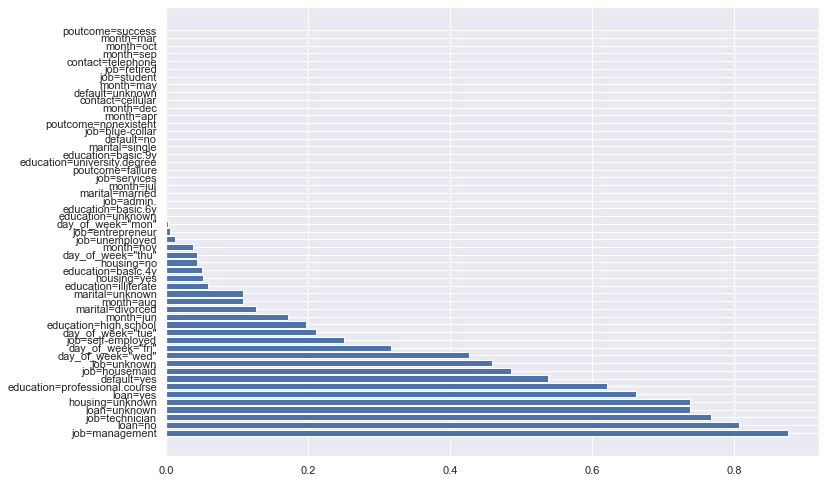

In [228]:
from sklearn.feature_selection import chi2
num_list_chi = num_list.drop(['y','duration'])
X_train_encoded_chi = X_train_encoded_chi.drop(columns=num_list_chi)
chi_scores = chi2(X_train_encoded_chi,Y_train)
p_values = pd.Series(chi_scores[1],index = X_train_encoded_chi.columns)
p_values.sort_values(ascending = False , inplace = True)
plt.barh(p_values.index,p_values)
p_values > 0.95

None of the categorical variables had a p-values greater than 0.95. This means our null hypothesis(categorical variables are independent of y) is rejected, thus we can not drop any categorical columns. If we look back at the correlation matrix, we can also see that all categorical values have a weak to medium correlation as well.
Looking at the p-value graph, we can see that poutcome = success is the most important column when compare to Y value.


##### ANOVA for feature selection with alpha of 0.05 for numerical features

age               False
cons.conf.idx     False
campaign          False
cons.price.idx    False
pdays             False
previous          False
emp.var.rate      False
euribor3m         False
nr.employed       False
dtype: bool

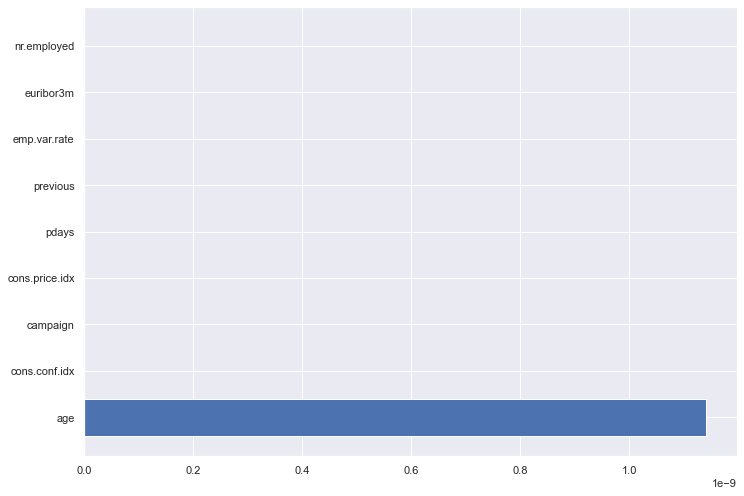

In [247]:
from sklearn.feature_selection import f_classif
X_train_encoded_ANOVA = X_train_encoded[num_list_chi]
anova = f_classif(X_train_encoded_ANOVA,Y_train)
p_values = pd.Series(anova[1],index = X_train_encoded_ANOVA.columns)
p_values.sort_values(ascending = False , inplace = True)
plt.barh(p_values.index,p_values)
p_values > 0.95

We can also see that none of the numerical features have a p value greater than 0.95, meaning we will have to keep all the features. Note, the xlabels are in 1E-9.

##### Pairwise Correlation Anaylsis

In [251]:
###Correlation > 0.3 is considered moderated or highly correlated.
a = bankdata[num_list].corr().abs().unstack().sort_values(kind='quicksort',ascending=False)
b = a.drop_duplicates()
b[b>0.3]

age             age               1.000000
emp.var.rate    euribor3m         0.972244
nr.employed     euribor3m         0.945146
                emp.var.rate      0.906949
emp.var.rate    cons.price.idx    0.775293
cons.price.idx  euribor3m         0.688180
pdays           previous          0.587508
nr.employed     cons.price.idx    0.521945
                previous          0.501411
euribor3m       previous          0.454571
previous        emp.var.rate      0.420587
duration        y                 0.405297
nr.employed     pdays             0.372659
                y                 0.354669
y               pdays             0.324948
                euribor3m         0.307740
dtype: float64

Accuracy Score:  0.8981326569161855
Precision_score:  0.6468428781204112
Recall_score:  0.2110179640718563
AUC Score  0.7906898765191996


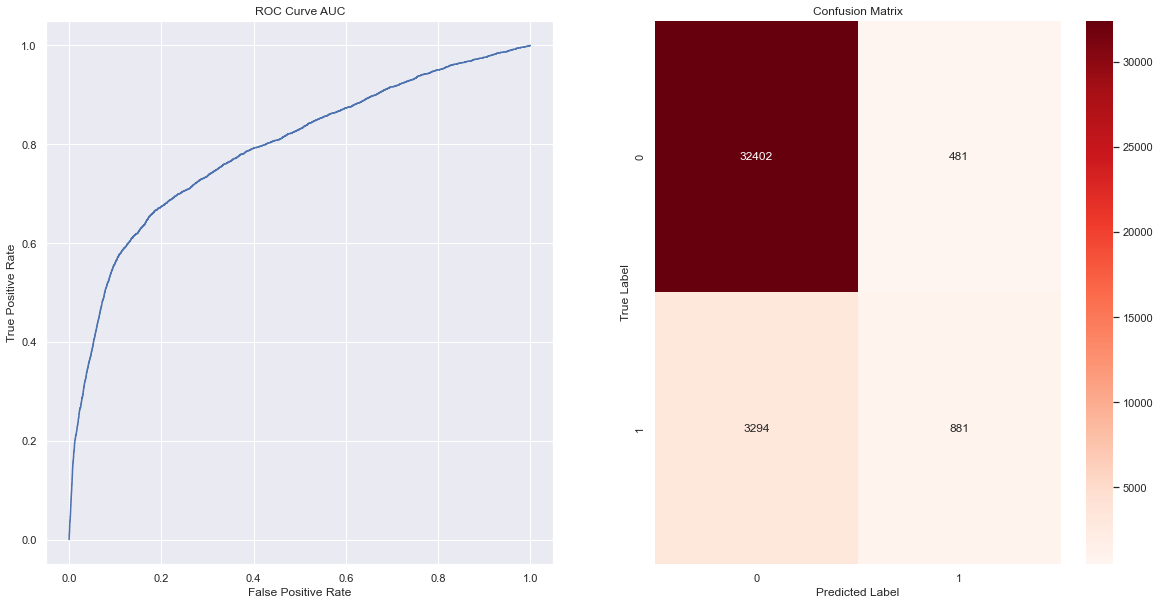

In [277]:
### Dropping highly correlated[Correlation > 0.75] numerical variables to see if it will improve the CV score
X_train_encoded_NoNum= X_train_encoded.drop(columns=['euribor3m','nr.employed','cons.price.idx'])
LogModel_Corr_drop = LogisticRegression(max_iter=10000,class_weight='balance')
LogModel_Corr_drop.fit(X_train_encoded_NoNum,Y_train)
ypredmv3=LogModel_Corr_drop.predict(X_train_encoded_NoNum)
Logmetrics(LogModel_Corr_drop,X_train_encoded_NoNum,ypredmv3)

In [278]:
LogModel_Corr_dropCV=np.mean(cross_val_score(LogModel_Corr_drop,X_train_encoded_NoNum,y=Y_train,cv=5,scoring='roc_auc'))
LogModel_Corr_dropCV

0.7883420265746856

Dropping highly correlated numerical columns seem to only improve the AUC slightly.

##### Hyperparamter tuning using Gridsearch

In [294]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogModel_Corr_drop
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01,20]
grid = dict(penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_encoded, Y_train)
grid_result.get_params
grid_result.best_estimator_.get_params()

{'C': 20,
 'class_weight': 'balance',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [295]:
#Trying C in range of 10 to 20 spaced evenly
model = LogModel_Corr_drop
penalty = ['l2']
c_values = np.linspace(10,20,1)
grid = dict(penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_encoded, Y_train)
grid_result.get_params
grid_result.best_estimator_.get_params()

{'C': 10.0,
 'class_weight': 'balance',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Accuracy Score:  0.8080306546494684
Precision_score:  0.32420145950472545
Recall_score:  0.6491017964071857
AUC Score  0.791882804958462


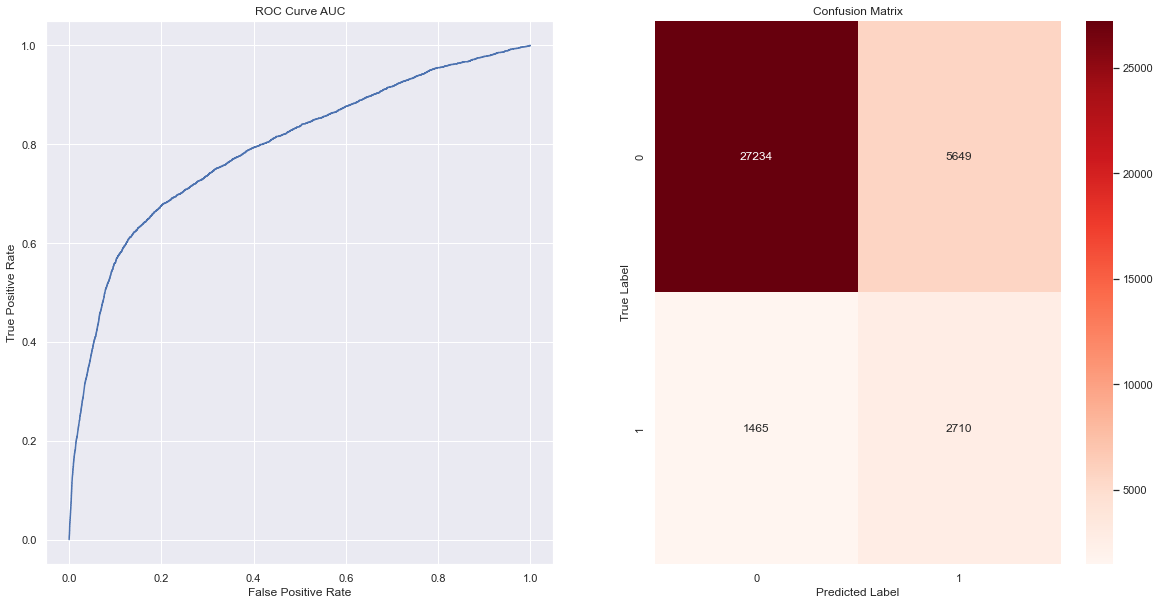

In [296]:
# the best alpha value after two iteration of Gridsearch is 10
LogModelGS= LogisticRegression(max_iter=10000,class_weight='balanced',C=10)
LogModelGS.fit(X_train_encoded_NoNum,Y_train)
ypredGS=LogModelGS.predict(X_train_encoded_NoNum)
LogModelGS.score(X_train_encoded_NoNum,Y_train)
Logmetrics(LogModelGS,X_train_encoded_NoNum,ypredGS)

In [299]:
LogModel_Corr_dropCV_Hyper=np.mean(cross_val_score(LogModelGS,X_train_encoded_NoNum,y=Y_train,cv=5,scoring='roc_auc'))
LogModel_Corr_dropCV_Hyper

0.7884181940292663

Tuning the hyperparamter for Logistic Regression did not seem to improve much for the model.

In [400]:
AUC_score = pd.DataFrame(data=[0.7895197143346734,0.7906898765191996,0.791882804958462],columns=['Training AUC'],index = ['Logistic Regression','Logistic Regression + Corr Analysis','Logistic Regression + Corr Analysis + HyperParameter Tuning'])
AUC_score['CrossVal AUC'] = [LogModelV1_CV,LogModel_Corr_dropCV,LogModel_Corr_dropCV_Hyper]
AUC_score

,Training AUC,CrossVal AUC
Logistic Regression,0.789520,0.787694
Logistic Regression + Corr Analysis,0.790690,0.788342
Logistic Regression + Corr Analysis + HyperParameter Tuning,0.791883,0.788418


### Random Forest

In [327]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model_V1 = RandomForestClassifier(n_estimators=1000,class_weight='balanced')
random_forest_model_V1.fit(X_train_encoded,Y_train)
y_predRF=random_forest_model_V1.predict(X_train_encoded)

Wall time: 0 ns


Accuracy Score:  0.9936855739651357
Precision_score:  0.9475357710651828
Recall_score:  0.9992814371257485
AUC Score  0.9993527915430884


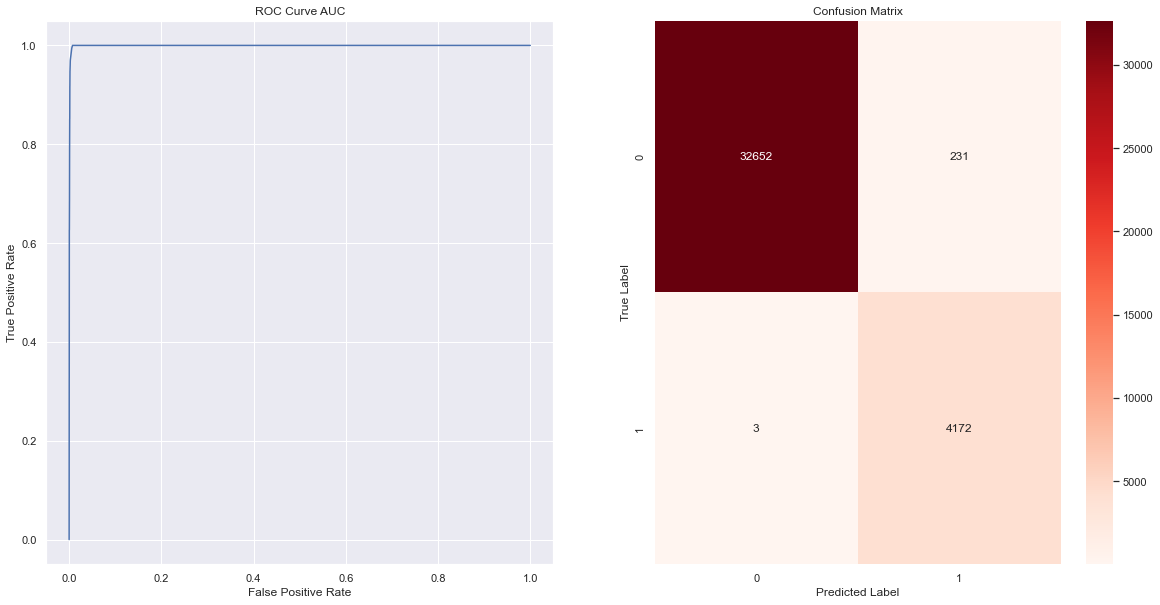

In [335]:
Logmetrics(random_forest_model_V1,X_train_encoded,y_predRF)

In [336]:
RFCV = np.mean(cross_val_score(random_forest_model_V1,X_train_encoded,Y_train,cv=5,scoring='roc_auc'))
RFCV

0.7739794927513064

The current RandomForest's performance and runtime is quiet poor. This is most likely due to high cardinality in some of the categorical variable, meaning the tree getting "lost". We will try to aggerate some of the data together to reduce this. 

##### Random Forest with manual aggregate high cardinal categorical variables

In [339]:
#### Maunally aggerate high cardinal catergical values to improve performance
X_train_V2=X_train.drop(columns='duration')
X_train_V2.education=X_train_V2.education.replace({'basic.9y':'less than high school','basic.4y':'less than high school','basic.6y':'less than high school','illiterate':'less than high school','professional.course':'other/unknown','unknown':'other/unknown'})
#OneHotEncode X_train_V2
from sklearn.feature_extraction import DictVectorizer
DictV = DictVectorizer()
DictV.fit(X_train_V2[cat_list].to_dict(orient='records'))
feature_names=DictV.get_feature_names_out()
Dict_data = DictV.transform(X_train_V2[cat_list].to_dict(orient='records')).toarray()
Dict_dataFrame = pd.DataFrame(data=Dict_data,columns = feature_names,index=X_train_V2.index)
X_train_encoded_V2 = pd.concat([X_train_V2,Dict_dataFrame],axis=1)
X_train_encoded_V2 = X_train_encoded_V2.drop(columns=cat_list)

In [342]:
#Fitting a RandomForestClassifer into the new X_train_V2 data
random_forest_model_agg = RandomForestClassifier(class_weight='balanced')
random_forest_model_agg.fit(X_train_encoded_V2,Y_train)
y_predagg=random_forest_model_agg.predict(X_train_encoded_V2)

Accuracy Score:  0.9933077877921097
Precision_score:  0.9463514435098886
Recall_score:  0.997125748502994
AUC Score  0.9990460207219901


0.7725031943916406

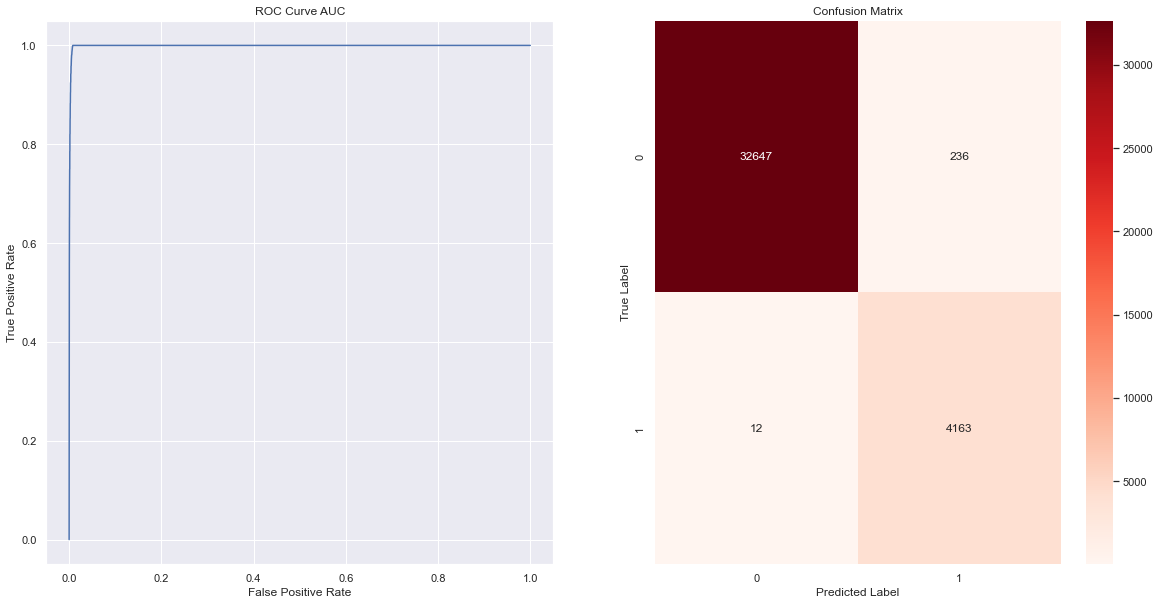

In [343]:
Logmetrics(random_forest_model_agg,X_train_encoded_V2,y_predagg)
RFHighCardinalCV=np.mean(cross_val_score(random_forest_model_agg,X_train_encoded_V2,Y_train,cv=5,scoring='roc_auc'))
RFHighCardinalCV

With the aggregate columns, it seems to slightly decrease the AUC score. However, the runtime is sufficiently faster.

##### Random Forest with aggregate high cardinal categorical variables using count encoding

Instead of using OneHotEncoding which can generate numerous columns ie(if color column contains:Red,Blue & green, onehot encoding will generate 3 new columns), we will use count encoding for high cardinal categorical variables to see if it will improve performance. 

In [348]:
#Count_encoding instead of onehotencoding to combat high cadinarity
import category_encoders as ce
count_enc = ce.CountEncoder()
count_enc.fit(X_train[['education','job','month','day_of_week','marital']])
count_encoded=count_enc.transform(X_train[['education','job','month','day_of_week','marital']])
count_data = count_encoded.add_suffix('_count')

In [349]:
X_train_count_enc= X_train.merge(count_data,on=count_data.index)
X_train_count_enc= X_train_count_enc.drop(columns=['education','job','month','day_of_week','marital'])
X_train_count_enc= X_train_count_enc.set_index(X_train_count_enc.key_0) 
X_train_count_enc= X_train_count_enc.drop(columns=['key_0'])

In [350]:
#### OneHotEncode the low cardinaitly variables
DictV=DictVectorizer()
DictV.fit(X_train[['default','housing','loan','contact','poutcome']].to_dict(orient='records'))
feature_names=DictV.get_feature_names_out()
Dict_data = DictV.transform(X_train[['default','housing','loan','contact','poutcome']].to_dict(orient='records')).toarray()
Dict_dataFrame = pd.DataFrame(data=Dict_data,columns = feature_names,index=X_train.index)
X_train_count_enc = pd.concat([X_train_count_enc,Dict_dataFrame],axis=1)
X_train_count_enc = X_train_count_enc.drop(columns=['default','housing','loan','contact','poutcome','duration'])
X_train_count_enc

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_count,job_count,month_count,day_of_week_count,marital_count,contact=cellular,contact=telephone,default=no,default=unknown,default=yes,housing=no,housing=unknown,housing=yes,loan=no,loan=unknown,loan=yes,poutcome=failure,poutcome=nonexistent,poutcome=success
16562,36.0,3.0,999.0,0.0,1.4,93.918,-42.7,4.963,5228.1,11005,1278,6440,7318,10401,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
13626,39.0,1.0,999.0,0.0,1.4,93.918,-42.7,4.963,5228.1,3763,898,6440,7729,22423,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
37251,36.0,1.0,4.0,1.0,-2.9,92.201,-31.4,0.881,5076.2,5397,3585,5528,7098,22423,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
39925,44.0,1.0,999.0,0.0,-1.7,94.055,-39.8,0.742,4991.6,4689,1278,4829,7729,4165,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
11213,44.0,1.0,999.0,0.0,1.4,94.465,-41.8,4.961,5228.1,1553,8315,4829,7729,22423,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16474,37.0,1.0,999.0,0.0,1.4,93.918,-42.7,4.963,5228.1,8582,9400,6440,7318,4165,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
16242,49.0,9.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1,8582,3585,6440,7272,4165,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
17279,54.0,3.0,999.0,0.0,1.4,93.918,-42.7,4.962,5228.1,11005,9400,6440,7098,22423,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6809,40.0,5.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,3763,8315,12403,7318,22423,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [357]:
RFCountEnc = RandomForestClassifier(class_weight='balanced')
RFCountEnc.fit(X=X_train_count_enc,y=Y_train)
y_predRFCountEnc=RFCountEnc.predict(X_train_count_enc)

Accuracy Score:  0.9936046197852015
Precision_score:  0.9475
Recall_score:  0.998562874251497
AUC Score  0.9990364895607927


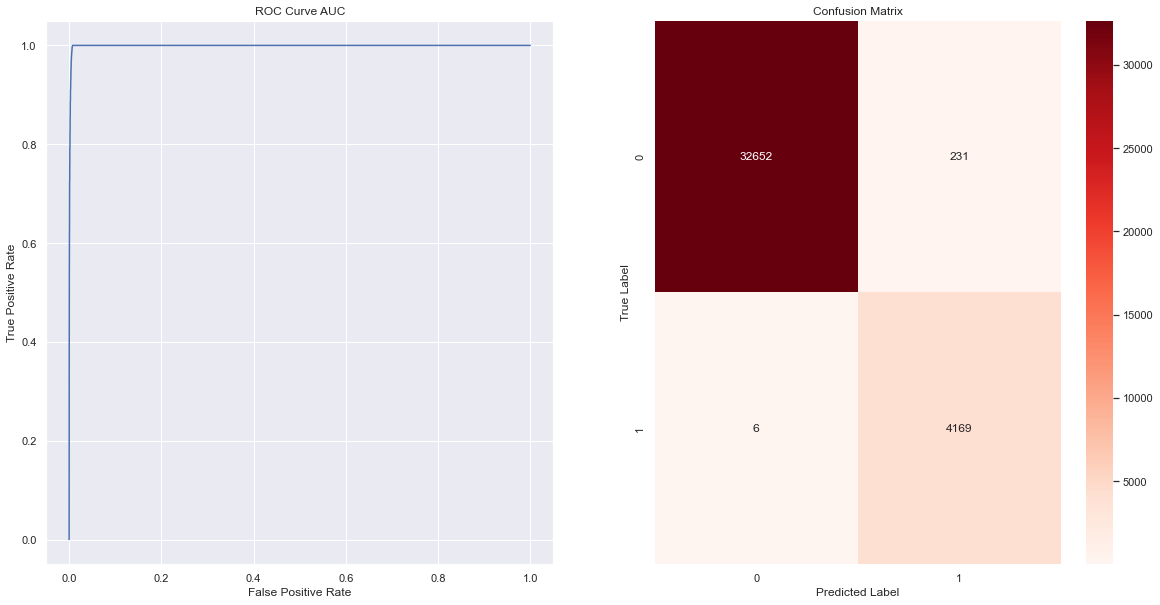

In [358]:
Logmetrics(RFCountEnc,X_train_count_enc,y_predRFCountEnc)

In [359]:
RFCountEncodedCV = np.mean(cross_val_score(RFCountEnc,X_train_count_enc,Y_train,cv=5,scoring='roc_auc'))
RFCountEncodedCV

0.7732531045612131

There is a slight improve using CountEncoding over maunally aggregate high cardinality variables. Just like the previous model, the runtime is sufficiently faster than the based RandomForest with a small decrase in AUC score. Given that we still need to find tune the hyperparamter for the RandomForest, we will be using the count encoded dataset moving forward to save on computing time.

##### Random Forest with HyperParameter tuning

In [65]:
#Tuning hyperparamter that will help with overfitting
model = RFCountEnc
grid = {'max_depth':[10,30,50,80],
        'min_samples_split':[100,500,1000,2000],
        'max_leaf_nodes':[50,100,500,1000],
        'min_samples_leaf':[100,200,500,1000]}
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train_encoded, Y_train)
grid_result.get_params
grid_result.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': 50,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 100,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Accuracy Score:  0.8380376706783961
Precision_score:  0.37373876986869387
Recall_score:  0.6476646706586826
AUC Score  0.8262539859611131


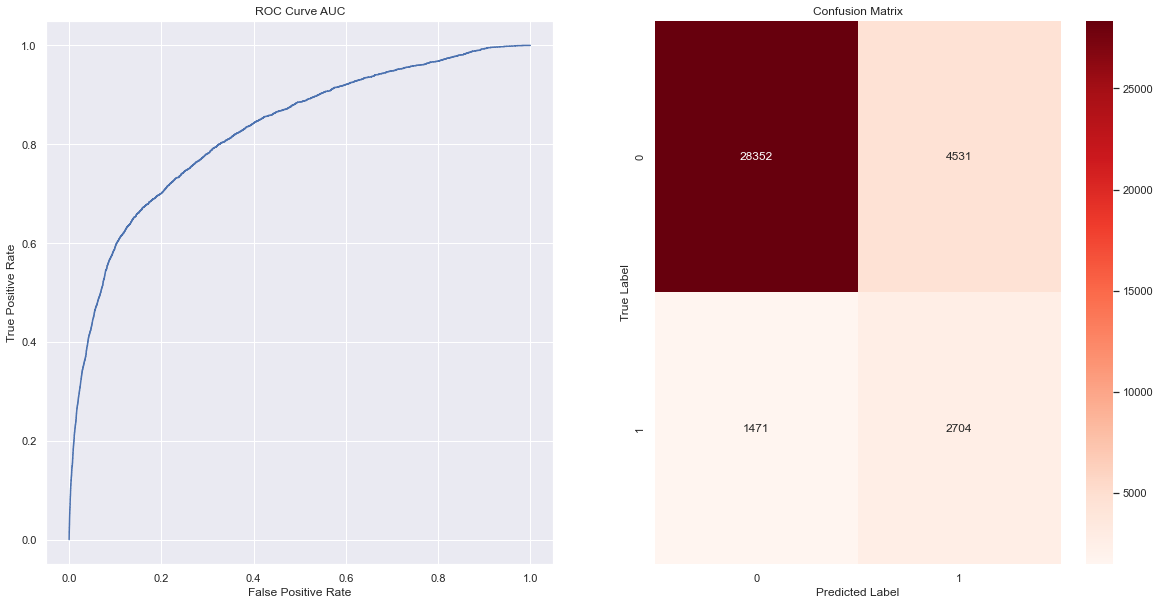

In [360]:
RFCountEncGV = RandomForestClassifier(max_depth=50,max_leaf_nodes=100,min_samples_leaf=100,min_samples_split=100,class_weight='balanced')
RFCountEncGV.fit(X=X_train_count_enc,y=Y_train)
y_predRFCountEncGV=RFCountEncGV.predict(X_train_count_enc)
Logmetrics(RFCountEncGV,X_train_count_enc,y_predRFCountEncGV)

In [361]:
RFCountEncodedGVCV = np.mean(cross_val_score(RFCountEncGV,X_train_count_enc,Y_train,cv=5,scoring='roc_auc'))
RFCountEncodedGVCV

0.7986936003676435

There is a increase in the AUC score using parameter tuning. It is very close to AUC=0.80 made from the researcher. This seems decision tree models are appropriate to this question. In the following sections, we will use XGBoost and CatBoost, both of which are decision tree ensemble

In [401]:
AUC_score_RF = pd.DataFrame({'Training AUC':[0.9993527915430884, 0.9990460207219901,0.9990364895607927,0.8262539859611131],'CrossVal AUC':[RFCV,RFHighCardinalCV,RFCountEncodedCV,RFCountEncodedGVCV]},index=
                           ['Random Forest','Random Forest Aggregate','Random Forest CountEncoded','Random Forest CountEncoded + Hyperparameter Tuning'])
AUC_score = pd.concat([AUC_score,AUC_score_RF])
AUC_score

,Training AUC,CrossVal AUC
Logistic Regression,0.789520,0.787694
Logistic Regression + Corr Analysis,0.790690,0.788342
Logistic Regression + Corr Analysis + HyperParameter Tuning,0.791883,0.788418
Random Forest,0.999353,0.773979
Random Forest Aggregate,0.999046,0.772503
Random Forest CountEncoded,0.999036,0.773253
Random Forest CountEncoded + Hyperparameter Tuning,0.826254,0.798694


### XGBoost

Accuracy Score:  0.9285714285714286
Precision_score:  0.870873786407767
Recall_score:  0.4297005988023952
AUC Score  0.9018146791901098


0.7884315880042271

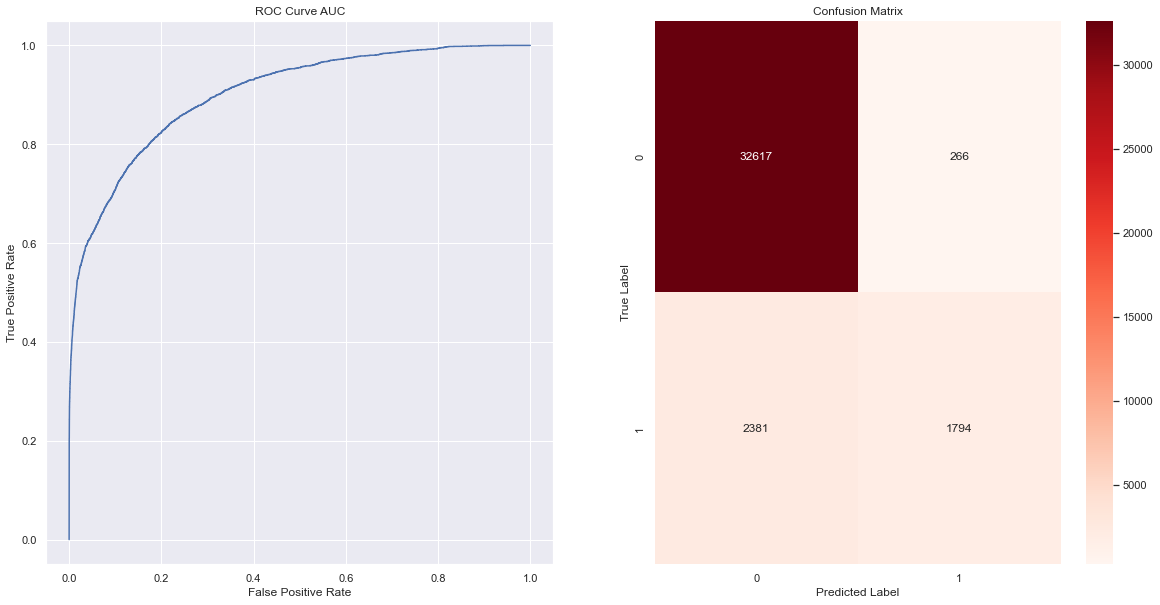

In [408]:
### XGB Based Model
import xgboost as xgb
xgb_v1 = xgb.XGBClassifier(use_label_encoder=False,eval_metric='aucpr')
xgb_v1.fit(X_train_encoded,Y_train,eval_metric='aucpr')
y_predmv7 = xgb_v1.predict(X_train_encoded)
Logmetrics(xgb_v1,X_train_encoded,y_predmv7)
xgb_cv=np.mean(cross_val_score(xgb_v1,X_train_encoded,Y_train,cv=5,scoring='roc_auc'))
xgb_cv

XGBoost based looks very promising,as AUC = 0.78 is the highest based model we have so far. We will perform hyperparamter tuning to see if we can improve the model.

##### XGBoost with Hyperparameter tuning

In [72]:
#GridSearchCV to optimize 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_grid_xg = {
    'scale_pos_weight':np.linspace(1,10,2),
    'max_depth': range(1,10),
    'learning_rate':np.linspace(0.01,0.09,20)}
gridsearch = GridSearchCV(xgb_v1,param_grid_xg,cv=3,scoring='roc_auc')
gridsearch.fit(X_train_encoded,Y_train)

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\leung\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False,
                                     eval_metric='aucpr', gamma=0, gpu_id=-1,
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints=...
                                     validate_parameters=1, verbosity=None),
             param_grid={'learning_rate': array([0.01      , 0.01421053, 0.01842105, 0.02263158, 0.02684211,
       0.03105263, 0.03526316, 0.03947368, 0.04368421, 0.047

In [73]:
xgb_best = gridsearch.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='aucpr', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.056315789473684215,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.0, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Accuracy Score:  0.9098440282799936
Precision_score:  0.7485101311084624
Recall_score:  0.3008383233532934
AUC Score  0.840177253375741


0.8041807767148554

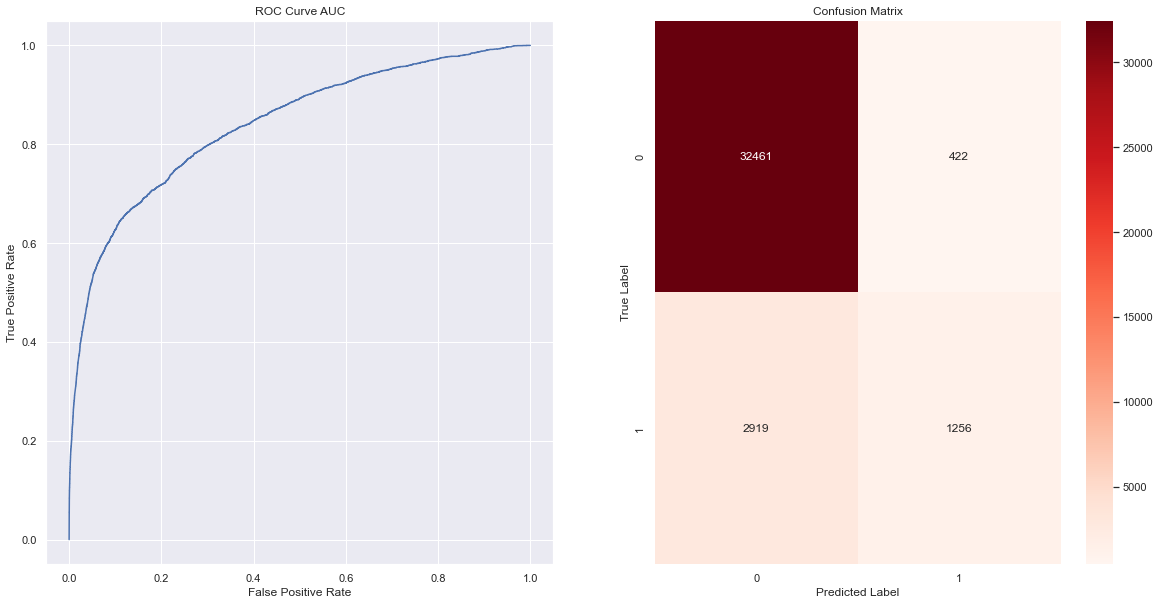

In [405]:
### XGBoost with GridSearchCV
import xgboost as xgb
xgb_grid = xgb.XGBClassifier(use_label_encoder=False,learning_rate=0.056315789473684215,max_depth = 6,gamma=1.05,eval_metric='aucpr')
xgb_grid.fit(X_train_encoded,Y_train,eval_metric='aucpr')
y_predmv7 = xgb_grid.predict(X_train_encoded)
Logmetrics(xgb_grid,X_train_encoded,y_predmv7)
xgb_grid_cv = np.mean(cross_val_score(xgb_grid,X_train_encoded,Y_train,cv=5,scoring='roc_auc'))
xgb_grid_cv

XGBoost with hyperparameter tunning provide us with a model slightly better than AUC score provided by the researchers (0.8)

In [414]:
AUC_XGB = pd.DataFrame({'Training AUC':[0.9018146791901098,0.9098440282799936],'CrossVal AUC':[xgb_cv,xgb_grid_cv]},index = ['XGBoost','XGBoost + Hyperparameter Tuning'])
AUC_XGB
AUC_score = pd.concat([AUC_score,AUC_XGB])
AUC_score

,Training AUC,CrossVal AUC
Logistic Regression,0.789520,0.787694
Logistic Regression + Corr Analysis,0.790690,0.788342
Logistic Regression + Corr Analysis + HyperParameter Tuning,0.791883,0.788418
Random Forest,0.999353,0.773979
Random Forest Aggregate,0.999046,0.772503
Random Forest CountEncoded,0.999036,0.773253
Random Forest CountEncoded + Hyperparameter Tuning,0.826254,0.798694
XGBoost,0.901815,0.788432
XGBoost + Hyperparameter Tuning,0.909844,0.804181


### CatBoost
Catboost is a relatively new boosting algorithm created by Yandex and gained popularity in the recent years. The main difference between XGBoost are two things: how decision tree grows and how the alogrithm handle categorical variables. Unlike XGBoost's decision tree that grows via depth, Catboost's decision tree grows symmetrically. CatBoost does not require the user to do catagorical encoding before fitting the data. It only requires the indices of the categorical features, and will perform an ordered encoding when fitting the model

Accuracy Score:  0.9137028441901883
Precision_score:  0.7697404748757593
Recall_score:  0.3338922155688623
AUC Score  0.8314417784265425


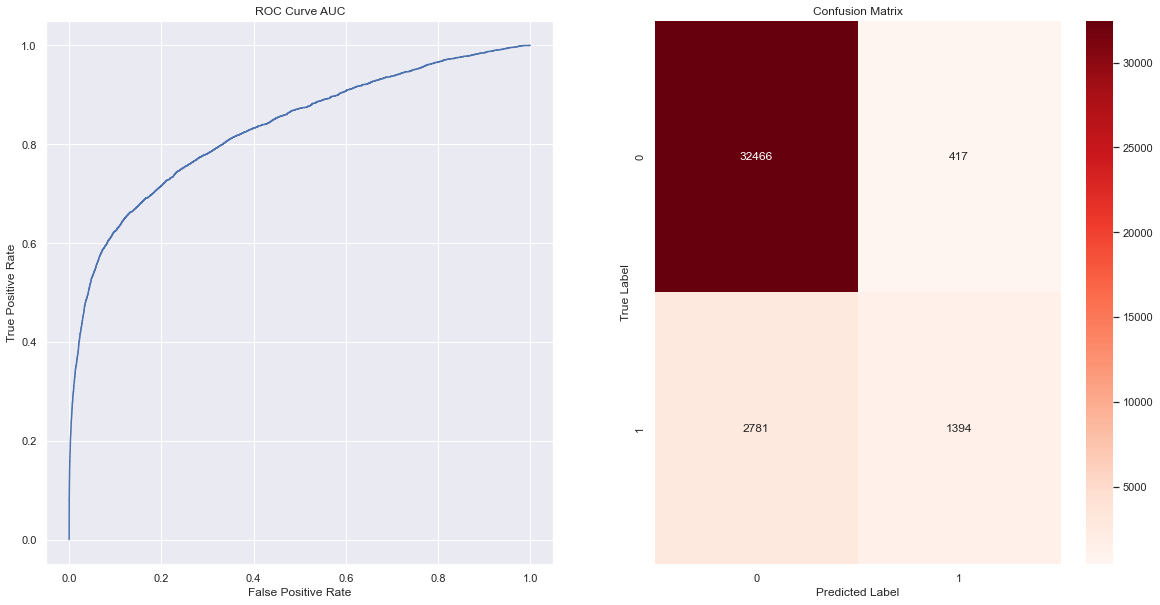

In [415]:
#CatBoost
from catboost import CatBoostClassifier
X_train_cat = X_train.drop(columns='duration')
catboostV1 = CatBoostClassifier(iterations = 1000)
categorical_features_indices = np.where(X_train_cat.dtypes != float)[0]
catboostV1.fit(X_train_cat,Y_train,cat_features=categorical_features_indices,verbose=False)
y_predmv7 = catboostV1.predict(X_train_cat)
Logmetrics(catboostV1,X_train_cat,y_predmv7)

We will be using Catboost.api's cross validation process instead of sklearn's

In [79]:
from catboost import cv, Pool
pool = Pool(X_train_cat,label=Y_train,cat_features=categorical_features_indices)
params = {"iterations": 1000,
          "loss_function": "Logloss",
          'custom_loss' : 'AUC'}
cv(pool,params,fold_count=5,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2693589462
bestIteration = 874

Training on fold [1/5]

bestTest = 0.2738876075
bestIteration = 770

Training on fold [2/5]

bestTest = 0.2689122392
bestIteration = 984

Training on fold [3/5]

bestTest = 0.267534632
bestIteration = 976

Training on fold [4/5]

bestTest = 0.2733068498
bestIteration = 841



,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.661541,0.000152,0.661523,0.000090,0.774542,0.004714
1,1,0.633743,0.000240,0.633719,0.000208,0.775473,0.004723
2,2,0.607215,0.000367,0.607187,0.000267,0.778294,0.005565
3,3,0.582528,0.000523,0.582490,0.000285,0.778429,0.005550
4,4,0.559747,0.000666,0.559669,0.000330,0.779619,0.005271
...,...,...,...,...,...,...,...
995,995,0.270793,0.002967,0.246791,0.000593,0.803321,0.003044
996,996,0.270792,0.002962,0.246774,0.000591,0.803332,0.003045
997,997,0.270794,0.002963,0.246762,0.000592,0.803328,0.003047
998,998,0.270794,0.002964,0.246737,0.000587,0.803336,0.003052


In [418]:
###CatBoost crossvalidated AUC score is the last row value of test-AUC mean.
Catboost_V1CV =0.803
Catboost_V1CV

0.803

Catboost was able to give the best based model AUC score after cross validation. This make sense since the Catboost algorithm will try to fit the best hyperparameters when fitting the model.

##### Feature Selection for Catboost
We will need to check if any features were negatively influencing the loss function of the model. If there is, we will remove the feature

In [80]:
#Check if there is any feature that is negatively influnecing on the loss function.
np.array(catboostV1.get_feature_importance(pool,type='LossFunctionChange',prettified=True))

array([['nr.employed', 0.01175349306382839],
       ['euribor3m', 0.011637514656401013],
       ['pdays', 0.004162544678520702],
       ['campaign', 0.0025169473549799077],
       ['age', 0.0024421694497546906],
       ['contact', 0.002302838994737877],
       ['month', 0.0020904963087909397],
       ['emp.var.rate', 0.0012878801646152294],
       ['cons.conf.idx', 0.001234146614701892],
       ['day_of_week', 0.001233070599261009],
       ['poutcome', 0.0009977748116860954],
       ['education', 0.0008464673002026905],
       ['cons.price.idx', 0.0008339721620451157],
       ['job', 0.0007554703258135789],
       ['marital', 0.000393404498373523],
       ['previous', 0.0003745418883126887],
       ['housing', 0.00029005071206264965],
       ['loan', 0.0002552260832777848],
       ['default', 0.0002152723345547845]], dtype=object)

There isn't any feature that is negatively impacting the loss function. Feature selection might not be useful on optimizing the CatBoost algorithm

##### Catboost with Hyperparameter tuning
This step might not improve the catboost model. This is because the algorithm will inherently to find a close to optimal learning rate. Nonetheless, it is good practice to tune every model's hyperparameters. 

Note:we will be splitting the gridsearch into two seperate steps to improve performance, as one_hot_max_size does not influence the other hyperparamters 

In [86]:
#CatBoost with GridSearchCV for best learning rate 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate':np.linspace(0.015,0.02,10),
    'depth':range(4,5,6),
    'iterations':[2000], 
    'verbose':[False]}
gridsearch = GridSearchCV(catboostV1,param_grid,cv=3,scoring='roc_auc')
gridsearch.fit(X_train_encoded,Y_train)
CatBoost_best = gridsearch.best_estimator_.get_params()
CatBoost_best

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E225E07A30>,
             param_grid={'depth': range(4, 5, 6), 'iterations': [2000],
                         'learning_rate': array([0.015     , 0.01555556, 0.01611111, 0.01666667, 0.01722222,
       0.01777778, 0.01833333, 0.01888889, 0.01944444, 0.02      ]),
                         'verbose': [False]},
             scoring='roc_auc')

In [87]:
CatBoost_best = gridsearch.best_estimator_.get_params()
CatBoost_best

{'iterations': 2000, 'learning_rate': 0.02, 'depth': 4, 'verbose': False}

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate':[0.0172222],
    'depth':[4],
    'iterations':[2000],
    'one_hot_max_size':np.linspace(1,10,10),
    'verbose':[False]}
gridsearch = GridSearchCV(catboostV1,param_grid,cv=3,scoring='roc_auc')
gridsearch.fit(X_train_encoded,Y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E225E07A30>,
             param_grid={'depth': [4], 'iterations': [2000],
                         'learning_rate': [0.0172222],
                         'one_hot_max_size': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'verbose': [False]},
             scoring='roc_auc')

In [89]:
CatBoost_OneHot_search = gridsearch.best_estimator_.get_params()
CatBoost_OneHot_search

{'iterations': 2000,
 'learning_rate': 0.0172222,
 'depth': 4,
 'verbose': False,
 'one_hot_max_size': 1.0}

In [426]:
# CatBoostV2
from catboost import CatBoostClassifier
X_train_cat = X_train.drop(columns='duration')
catboost_Grid = CatBoostClassifier(iterations = 2000,learning_rate=0.02,depth=4,one_hot_max_size=1)
categorical_features_indices = np.where(X_train_cat.dtypes != float)[0]
catboost_Grid.fit(X_train_cat,Y_train,cat_features=categorical_features_indices,verbose=False)

Accuracy Score:  0.9068487236224297
Precision_score:  0.7142857142857143
Recall_score:  0.288622754491018
AUC Score  0.8156618320698263


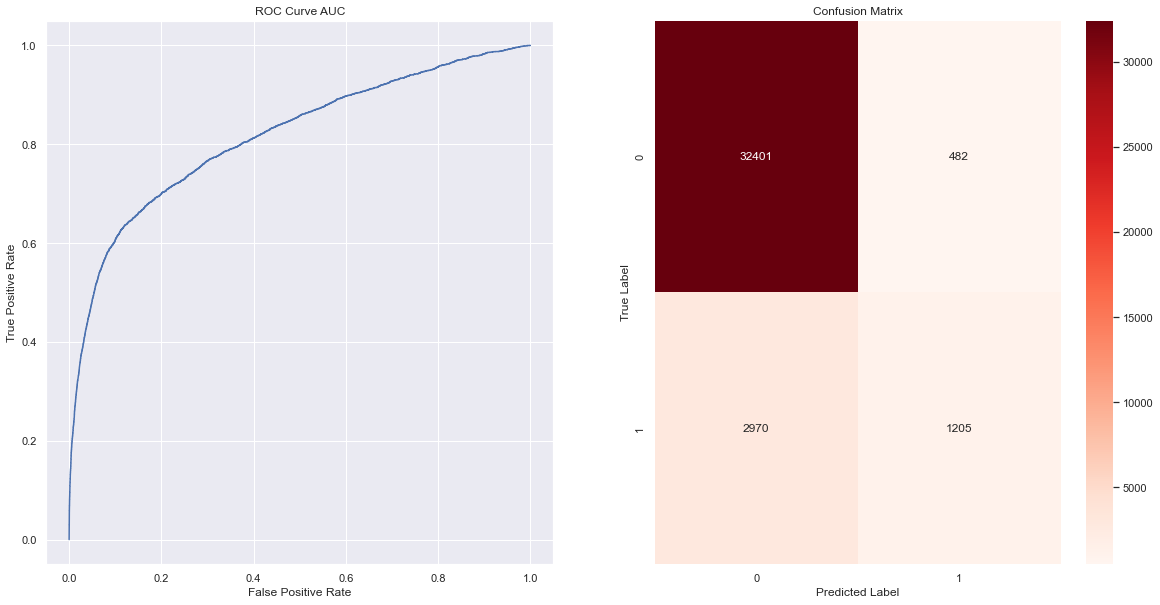

In [425]:
y_predmv9 = catboost_Grid.predict(X_train_cat)
Logmetrics(catboost_Grid,X_train_cat,y_predmv9)

In [419]:
pool = Pool(X_train_cat,label=Y_train,cat_features=categorical_features_indices)
params = {"iterations": 3000,
          "loss_function": "Logloss",
          'custom_loss' : 'AUC','eval_metric':'AUC','learning_rate':0.2,'depth':4,'one_hot_max_size':1}
cv(pool,params,fold_count=5,plot=True,verbose=False) 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.8099011343
bestIteration = 452

Training on fold [1/5]

bestTest = 0.803253581
bestIteration = 498

Training on fold [2/5]

bestTest = 0.8068081565
bestIteration = 426

Training on fold [3/5]

bestTest = 0.8047961559
bestIteration = 255

Training on fold [4/5]

bestTest = 0.7971062437
bestIteration = 87



,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.703500,0.009409,0.521981,0.001807,0.521855,0.002191
1,1,0.752034,0.022757,0.419861,0.002954,0.419678,0.001519
2,2,0.760896,0.013368,0.363532,0.002167,0.363319,0.000916
3,3,0.770931,0.005337,0.330491,0.002506,0.330158,0.001111
4,4,0.772422,0.009624,0.311846,0.002816,0.311386,0.000968
...,...,...,...,...,...,...,...
1995,1995,0.789983,0.007430,0.281863,0.004751,0.200958,0.001145
1996,1996,0.789953,0.007476,0.281872,0.004771,0.200942,0.001147
1997,1997,0.789941,0.007477,0.281871,0.004774,0.200906,0.001142
1998,1998,0.789896,0.007505,0.281888,0.004790,0.200893,0.001138


There was a slight decrease in the performance after doing hyperparameter tuning. This means the Catboost default learning algorithm was better.

In [423]:
AUC_Cat = pd.DataFrame({'Training AUC':[0.840177253375741,0.8314417784265425],'CrossVal AUC':[Catboost_V1CV,0.789827]},index = ['CatBoost','CatBoost + Hyperparameter Tuning'])
AUC_score = pd.concat([AUC_score,AUC_Cat])
AUC_score

,Training AUC,CrossVal AUC
Logistic Regression,0.789520,0.787694
Logistic Regression + Corr Analysis,0.790690,0.788342
Logistic Regression + Corr Analysis + HyperParameter Tuning,0.791883,0.788418
Random Forest,0.999353,0.773979
Random Forest Aggregate,0.999046,0.772503
Random Forest CountEncoded,0.999036,0.773253
Random Forest CountEncoded + Hyperparameter Tuning,0.826254,0.798694
XGBoost,0.901815,0.788432
XGBoost + Hyperparameter Tuning,0.909844,0.804181
CatBoost,0.840177,0.803000


### Best Model: XGBoost with Hyperparameter Tunning

After cross validating 11 different models, XGBoost with Hyperparamter Tunning is the best model with CrossVal AUC score of 0.804. We will test XGBoost with the testing data to see what is the testing AUC score.

In [691]:
#Modified verision of the function for testing data
def Logmetrics_test(model,X_value,Y_pred):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    proba = model.predict_proba(X_value)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test,model.predict_proba(X_value)[:,1])
    confmat = confusion_matrix(Y_test,Y_pred)
    print('Accuracy Score: ', accuracy_score(Y_test,Y_pred))
    print('Precision_score: ',precision_score(Y_test,Y_pred))
    print('Recall_score: ', recall_score(Y_test,Y_pred))
    print('AUC Score ', roc_auc_score(Y_test,proba))
    ax[0].plot(fpr,tpr)
    ax[0].set_title('ROC Curve AUC')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    sns.heatmap(confmat,annot=True,ax=ax[1],fmt='g',cmap='Reds')
    ax[1].set_title('Confusion Matrix')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')

Accuracy Score:  0.9106362311801846
Precision_score:  0.7553191489361702
Recall_score:  0.30603448275862066
AUC Score  0.8328488029179171


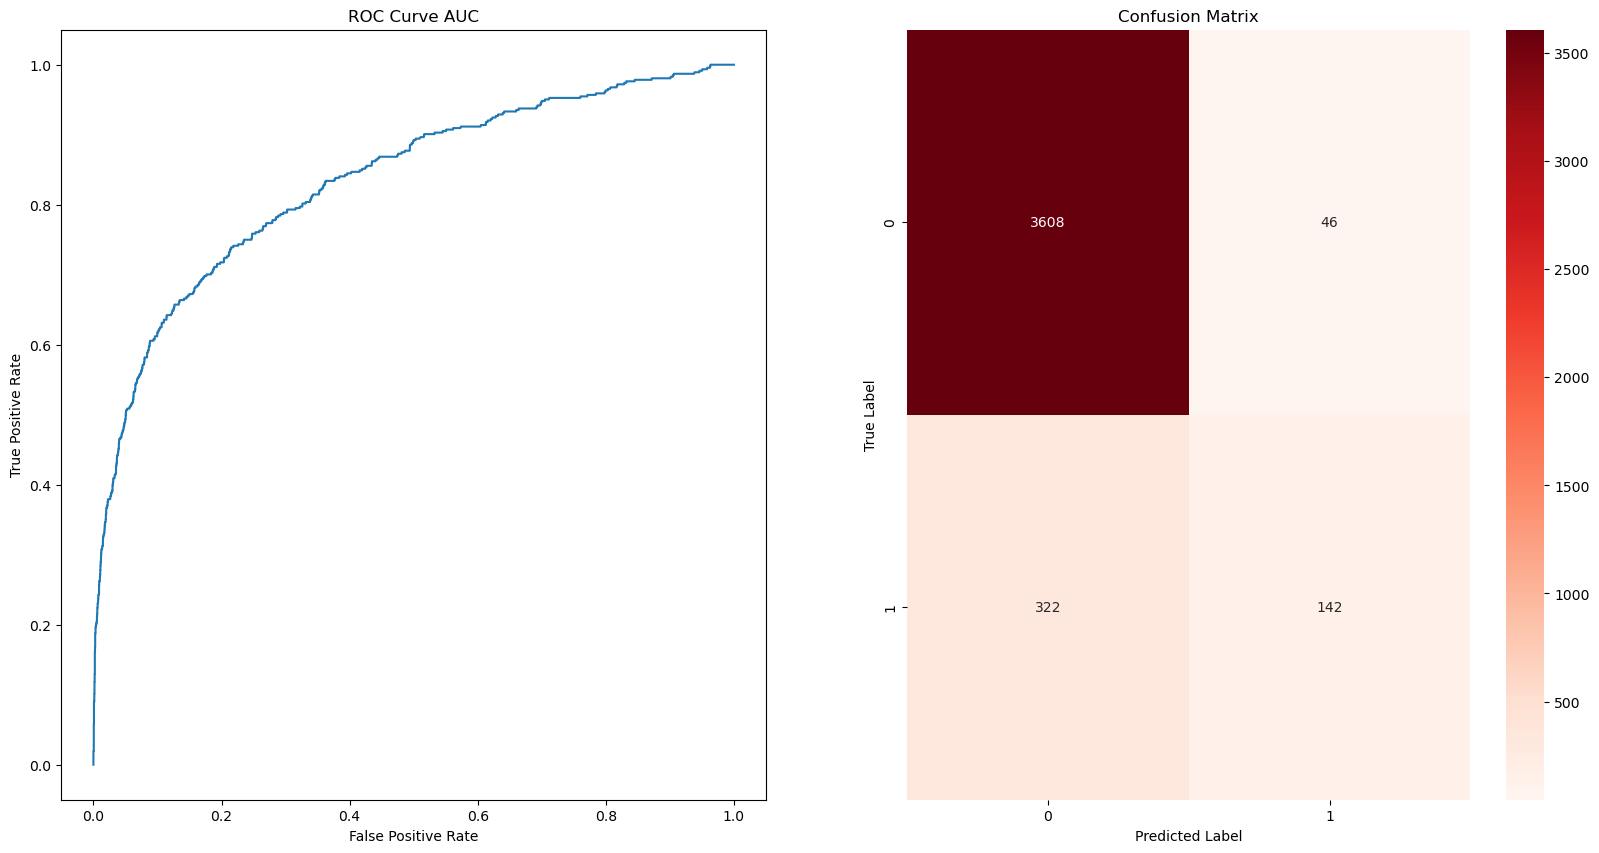

In [693]:
y_pred_test = xgb_grid.predict(X_test_enc)
y_pred_test
Logmetrics_test(xgb_grid,X_test_enc,y_pred_test)

On the testing data set, we were able to archieve AUC score of 0.83. This is slightly better than the cross validation AUC scores. The reason why is for the cross validation AUC scores, we are taking a mean of a 5 AUC score depending on the dataset. Algorithms will perform slightly differently on differenly dataset.

#### Features of XGBoost with Hyperparameter Tunning

XGboost algorithm is considered a blackbox algorithm. However, we can still get some understanding on what features were important using Shap values.

##### Feature importances using Shap Value

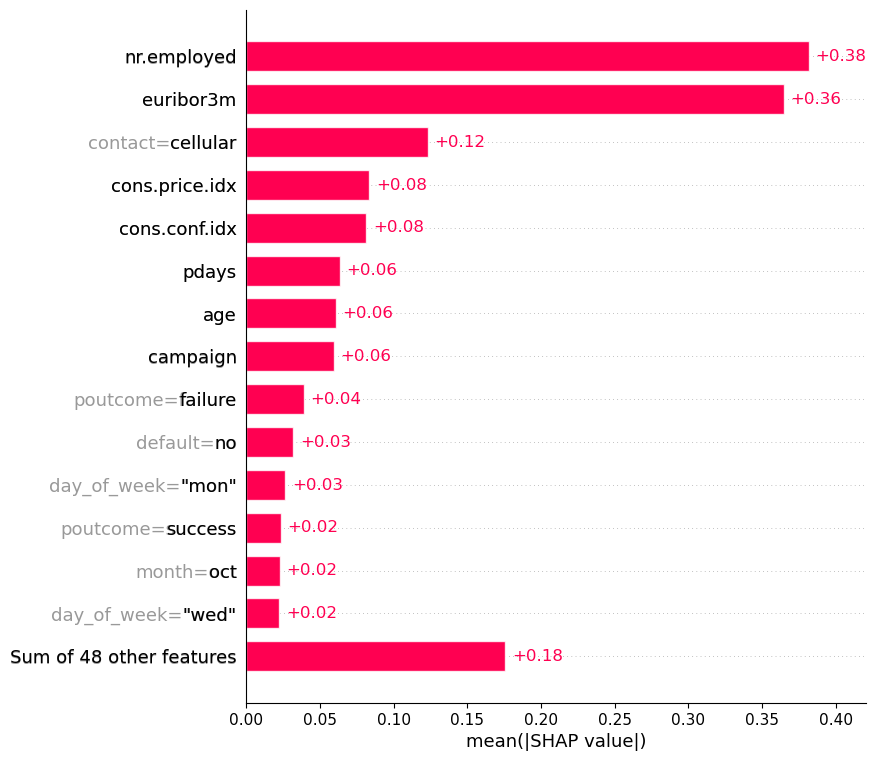

In [683]:
import shap
explainer = shap.Explainer(xgb_grid)
shap_values = shap.TreeExplainer(xgb_grid).shap_values(X_test_enc)
shap.plots.bar(explainer(X_test_enc),max_display=15)

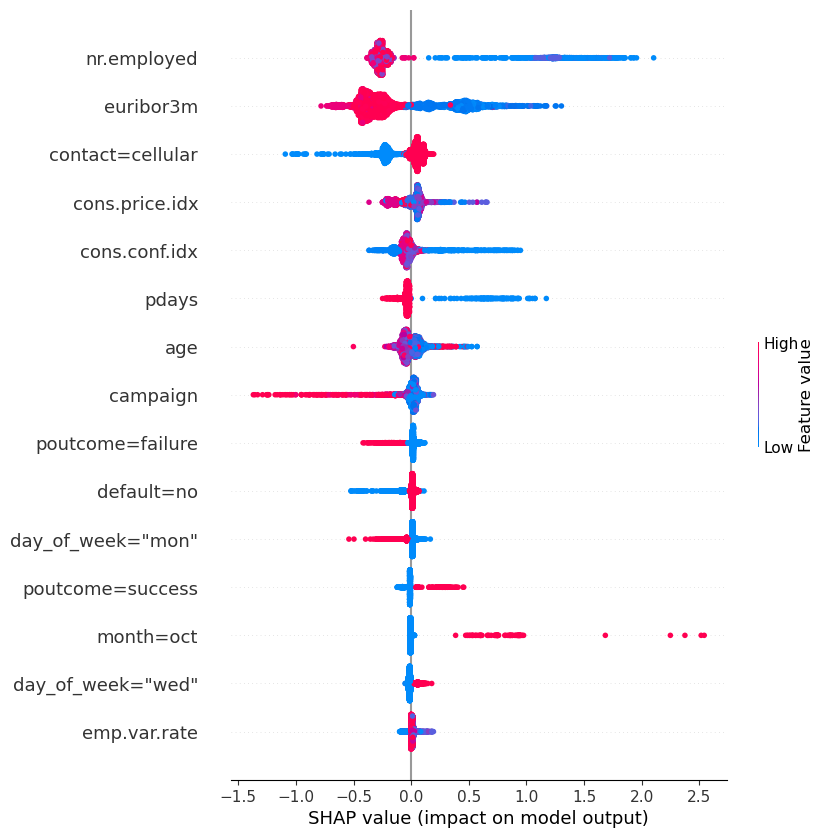

In [697]:
shap.summary_plot(shap_values,X_test_enc,max_display=15,plot_size=[8,10])

Using Shap value as the measure of feature importances, we can see the top 2 features are nr.employed & euribor3m. If we look at the correlation matrix, euribor3m was correlated to most of the economical measurements. We can infer that the overall economic health during a specific period of time is correlated on our population's decision to subscribe to a new long term deposit. Looking at beeswarm plot, we a higher Euribor 3month rates and nr.employed, the more it negatively impacted the our model.